# Воспроизводимость результатов детекции ключевых точек

Буду рассматривать следующие детекторы ключевых точек:
 - Shi-Tomasi
 - SIFT
 - ORB

План:
 - Repeatability точки - доля изображений, на которых она встречается
 - Repeatability детектора - среднее repeatability точек

Если бы мы хотели посчитать repeatability для совокупности всех изображенией, то получился бы следующая ситуация:

 - $\frac{1}{N_{points}} \sum_{k=1}^{N_{points}} \frac{1}{N_{img}} \sum_{i=1}^{N_{img}} I(k \in i) =\frac{1}{N_{img}} \sum_{i=1}^{N_{img}}  \frac{1}{N_{points}} \sum_{k=1}^{N_{points}} I(k \in i)$

 - Сумма размеров множеств ключевых точек по всем изображениям - это $ \sum_{i=1}^{N_{img}} \sum_{k=1}^{N_{points}} I(k \in i)$ (по сути, это замена порядка суммирования, ведь каждая особая точка в своем изображении учтется ровно 1 раз)~

 - Живем в предположении, что из того, что совпали какие-то две точки $p_{ij}$ и $p_{kl}$ ($p_{ij}$ - i точка на j изображении) и точки $p_{kl}$ и $p_{mn}$, то совпадут и $p_{ij}$ и $p_{mn}$. Тогда, чтобы посчитать $N_{points}$, можно для каждой точки посчитать число ее "братьев" n, а затем прибавить для каждой точки к ответу $\frac{1}{n + 1}$

Если же мы хотим посчитать repeatability для каждого изображения по отдельности, то:
 - Посчитаем для каждой особой точки, сколько раз она встретилась на других изображений
 - Поделим на число других изображений и на число точек на выбранном изображении всего


### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

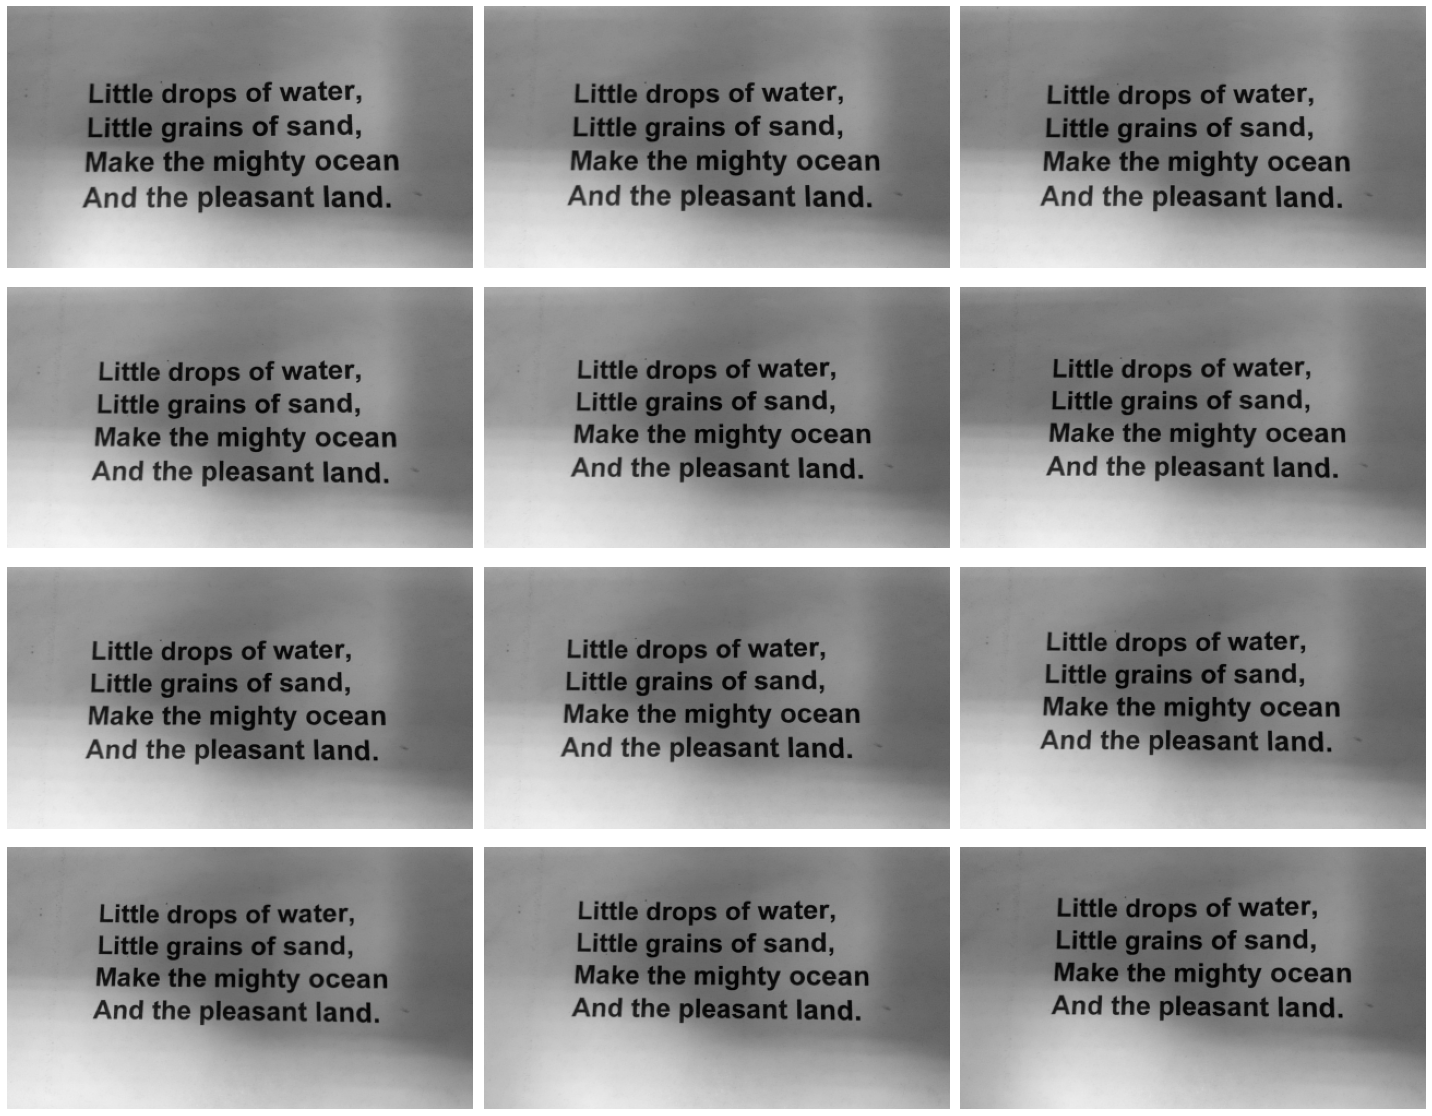

In [13]:
plt.figure(figsize=(20, 16))
for k in range(1, 13):
    img = cv2.imread(f"imgs/{k:02d}.tif")
    plt.subplot(4, 3, k)
    plt.imshow(img)
    plt.axis("off")
    plt.tight_layout()
plt.show()

### Shi-Tomasi
Здесь в качестве дескриптора возьмем дескриптор от ORB

In [109]:
def get_keypoints_st(img, max_corners=100):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = cv2.goodFeaturesToTrack(gray, max_corners, 0.01, 10).squeeze()
    _, des = cv2.ORB_create().compute(gray, [cv2.KeyPoint(p[0], p[1], 0) for p in kp])
    return kp, des

In [110]:
get_keypoints_st(cv2.imread(f"imgs/05.tif"))

(array([[108., 173.],
        [141., 173.],
        [ 80., 173.],
        [106., 140.],
        [121., 161.],
        [327., 133.],
        [291.,  81.],
        [162., 170.],
        [121., 139.],
        [ 95., 173.],
        [315.,  70.],
        [181., 178.],
        [100., 162.],
        [137., 135.],
        [258., 142.],
        [146., 157.],
        [275., 109.],
        [267., 103.],
        [302., 170.],
        [291.,  71.],
        [160., 142.],
        [319.,  80.],
        [334., 162.],
        [101.,  69.],
        [ 84., 142.],
        [278., 163.],
        [312., 111.],
        [301.,  74.],
        [196., 173.],
        [249.,  97.],
        [281.,  82.],
        [337., 143.],
        [ 87.,  98.],
        [118.,  69.],
        [ 88., 162.],
        [ 97.,  83.],
        [311.,  96.],
        [272.,  73.],
        [308., 133.],
        [103.,  98.],
        [101., 113.],
        [253., 174.],
        [159.,  69.],
        [259., 132.],
        [238., 164.],
        [3

### SIFT

In [89]:
def get_keypoints_sift(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), None)
    return np.array([p.pt for p in kp]), des

In [94]:
get_keypoints_sift(cv2.imread(f"imgs/05.tif"))

(array([[ 81.61096954, 172.66139221],
        [ 83.95132446, 168.89535522],
        [ 84.07432556, 141.81039429],
        ...,
        [350.95822144, 132.81422424],
        [352.15499878, 141.90611267],
        [352.15499878, 141.90611267]]),
 array([[  0.,   3.,   3., ...,   0.,   0.,   2.],
        [  0.,   5.,  22., ...,   0.,   0.,   1.],
        [  0.,  33.,  46., ...,   0.,   0.,   2.],
        ...,
        [  1.,  43., 113., ...,   0.,   0.,   4.],
        [138.,   7.,   4., ...,   8.,   2.,   1.],
        [  4.,   7.,   1., ...,   0.,   0.,   6.]], dtype=float32))

### ORB

In [91]:
def get_keypoints_orb(img):
    orb = cv2.ORB_create()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = orb.detect(gray, None)
    _, des = orb.compute(gray, kp)
    return np.array([p.pt for p in kp]), des

In [93]:
get_keypoints_orb(cv2.imread(f"imgs/05.tif"))

(array([[180.        , 178.        ],
        [303.        , 134.        ],
        [297.        ,  78.        ],
        [107.        , 140.        ],
        [316.        , 139.        ],
        [227.        ,  80.        ],
        [167.        , 172.        ],
        [153.        , 105.        ],
        [134.        , 105.        ],
        [154.        ,  76.        ],
        [121.        , 140.        ],
        [345.        , 175.        ],
        [247.        , 171.        ],
        [323.        , 136.        ],
        [300.        , 171.        ],
        [288.        , 140.        ],
        [219.        , 171.        ],
        [331.        , 140.        ],
        [185.        , 170.        ],
        [148.        , 160.        ],
        [297.        ,  74.        ],
        [309.        ,  71.        ],
        [271.        ,  79.        ],
        [ 89.        , 110.        ],
        [292.        , 104.        ],
        [169.        , 166.        ],
        [333

### Matching

In [95]:
def get_n_matches(des1, des2, norm=cv2.NORM_L2):
    return len(cv2.BFMatcher(norm, crossCheck=True).match(des1, des2))

### Experiments

In [111]:
def get_repeatability(kp_func, norm=cv2.NORM_L2):
    keypoints = []
    descriptors = []

    for k in range(1, 13):
        kp, des = kp_func(cv2.imread(f"imgs/{k:02d}.tif"))
        keypoints.append(kp)
        descriptors.append(des)
    
    repeatability = []
    for k in range(12):
        value = 0
        for l in range(12):
            if k != l:
                value += get_n_matches(descriptors[k], descriptors[l], norm=norm)
        repeatability.append(value / (11 * len(descriptors[k])))

    return repeatability

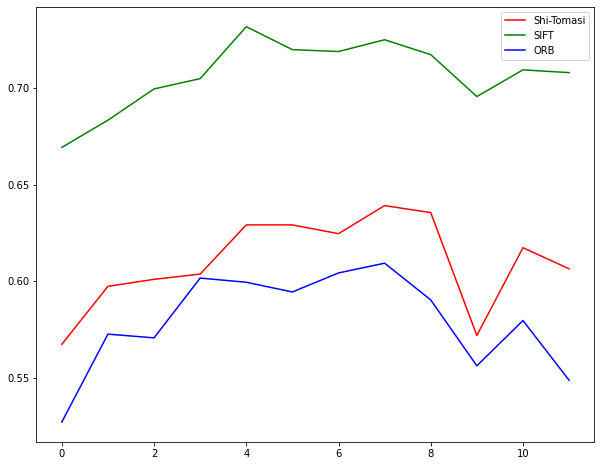

In [112]:
rep_st = get_repeatability(get_keypoints_st)
rep_sift = get_repeatability(get_keypoints_sift)
rep_orb = get_repeatability(get_keypoints_orb, norm=cv2.NORM_HAMMING)

plt.figure(figsize=(10, 8))
plt.plot(rep_st, c='r', label='Shi-Tomasi')
plt.plot(rep_sift, c='g', label='SIFT')
plt.plot(rep_orb, c='b', label='ORB')
plt.legend()
plt.show()

**ВЫВОДЫ**:

- ORB и SIFT показали результаты ниже, чем у Shi-Tomasi. Возможно, для них нужно поискать подходящие гиперпараметры. Также это может быть связано с тем, что первые два алгоритма генерируют больше особых точек
- Результаты немного напоминают параболу во всех случаях. Вероятно, это связано с тем, что изображения в середине последовательности ближе в среднем к остальным изображениям и поэтому для них относительное repetability выше

### Время работы

In [113]:
from time import time


def get_time(kp_func, repeats=5):
    times = []
    times_per_point = []
    for k in range(1, 13):
        start = time()
        for _ in range(repeats):
            kp, des = kp_func(cv2.imread(f"imgs/{k:02d}.tif"))
        end = time()
        kp, _ = kp_func(cv2.imread(f"imgs/{k:02d}.tif"))

        times.append((end - start) / repeats)
        times_per_point.append((end - start) / (repeats * kp.shape[0]))
    
    return times, times_per_point

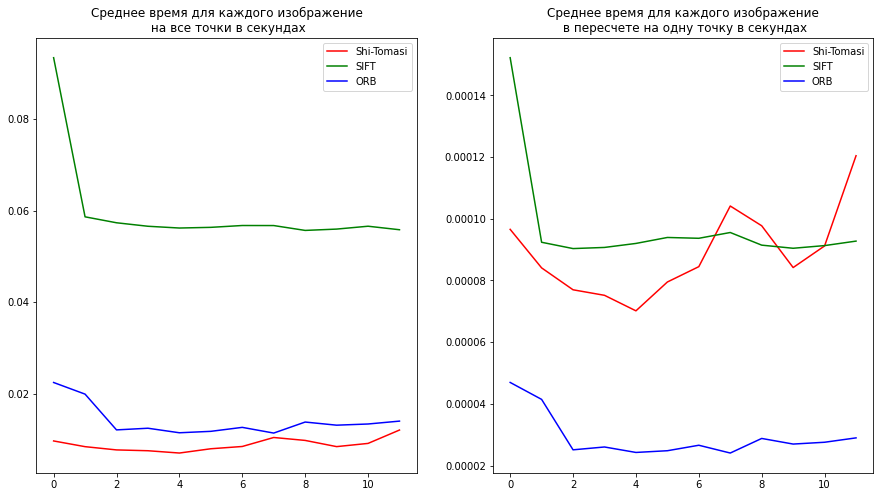

In [114]:
times_st, times_per_point_st = get_time(get_keypoints_st, repeats=10)
times_orb, times_per_point_orb = get_time(get_keypoints_orb, repeats=10)
times_sift, times_per_point_sift = get_time(get_keypoints_sift, repeats=10)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(times_st, c='r', label='Shi-Tomasi')
plt.plot(times_sift, c='g', label='SIFT')
plt.plot(times_orb, c='b', label='ORB')
plt.title('Среднее время для каждого изображение\n на все точки в секундах')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(times_per_point_st, c='r', label='Shi-Tomasi')
plt.plot(times_per_point_sift, c='g', label='SIFT')
plt.plot(times_per_point_orb, c='b', label='ORB')
plt.title('Среднее время для каждого изображение\n в пересчете на одну точку в секундах')
plt.legend()
plt.show()

**ВЫВОДЫ**:

- Видим, что ORB показывает результаты лучше по скорости. Мало того, что он работает достаточно быстро в целом, так еще и в пересчете на одну особую точку он оказывается быстрее остальных